<a href="https://colab.research.google.com/github/Twujira/TigistData110/blob/main/Project_2_FinalProduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Massey Ratings Project - Ibrahim, Yasmin, Angel, Tigist - MATH264

### Loading Data & EDA (Yasmin)

In [ ]:
# Importing libraries and data

import numpy as np
import pandas as pd

url = "https://github.com/Reben80/LinearAlgebra_DataScience/raw/main/nfl%201978.csv"
nfl = pd.read_csv(url)
print(nfl.head())


   season  week                    kickoff   home_team  home_score  \
0    1978     1  1978-09-02T00:00:00+00:00  Buccaneers          13   
1    1978     1  1978-09-03T00:00:00+00:00       Bears          17   
2    1978     1  1978-09-03T00:00:00+00:00     Bengals          23   
3    1978     1  1978-09-03T00:00:00+00:00       Bills          17   
4    1978     1  1978-09-03T00:00:00+00:00     Broncos          14   

   visitors_score visiting_team  
0              19        Giants  
1              10     Cardinals  
2              24        Chiefs  
3              28      Steelers  
4               6       Raiders  


In [ ]:
df_nfl = pd.DataFrame(nfl) # Creating a Matrix

df_nfl['point_differentials'] = df_nfl['home_score'] - df_nfl['visitors_score'] # Adding a new column for point differential

print(df_nfl.head())


rows = df_nfl['home_team']
columns = df_nfl['visiting_team']



   season  week                    kickoff   home_team  home_score  \
0    1978     1  1978-09-02T00:00:00+00:00  Buccaneers          13   
1    1978     1  1978-09-03T00:00:00+00:00       Bears          17   
2    1978     1  1978-09-03T00:00:00+00:00     Bengals          23   
3    1978     1  1978-09-03T00:00:00+00:00       Bills          17   
4    1978     1  1978-09-03T00:00:00+00:00     Broncos          14   

   visitors_score visiting_team  point_differentials  
0              19        Giants                   -6  
1              10     Cardinals                    7  
2              24        Chiefs                   -1  
3              28      Steelers                  -11  
4               6       Raiders                    8  


## Structuring our Matrix (Tigist)

In [ ]:
teams = sorted(set(nfl['home_team']).union(set(nfl['visiting_team']))) # combining the unique values from home and visitor columns
number_of_teams = len(teams) # the length of number of teams will be the number of teams...
differentials_df = np.zeros((number_of_teams, number_of_teams)) # initializing a 2d array filled with zeros

for index, row in nfl.iterrows():
    home_team = row['home_team']
    visiting_team = row['visiting_team']
    home_score = row['home_score']
    visitors_score = row['visitors_score']
    home_index = teams.index(home_team)
    visiting_index = teams.index(visiting_team)
# iterating through each row in nfl dataset and extracting specific column

    differentials_df[home_index][visiting_index] += (home_score - visitors_score)
    differentials_df[visiting_index][home_index] += (visitors_score - home_score)
# updating the differentials_df matrix by adding the calculated differentials_df

print(pd.DataFrame(differentials_df, index=teams, columns=teams))


            49ers  Bears  Bengals  Bills  Broncos  Browns  Buccaneers  \
49ers         0.0   -3.0     16.0    0.0      0.0   -17.0         3.0   
Bears         3.0    0.0      0.0    0.0     -9.0     0.0        -3.0   
Bengals     -16.0    0.0      0.0   -5.0      0.0    29.0         0.0   
Bills         0.0    0.0      5.0    0.0      0.0   -21.0       -21.0   
Broncos       0.0    9.0      0.0    0.0      0.0    12.0         0.0   
Browns       17.0    0.0    -29.0   21.0    -12.0     0.0         0.0   
Buccaneers   -3.0    3.0      0.0   21.0      0.0     0.0         0.0   
Cardinals     6.0   -7.0      0.0    0.0      0.0     0.0         0.0   
Chargers      0.0   33.0      9.0    0.0     10.0     0.0         0.0   
Chiefs        0.0    0.0      1.0  -11.0    -27.0    14.0       -17.0   
Colts         0.0    0.0      0.0  -14.0      1.0   -21.0         0.0   
Cowboys       0.0    0.0      0.0    0.0      0.0     0.0         0.0   
Dolphins      0.0    0.0     21.0    8.0      0.0  

## Preparing Data for our Visual (Ibrahim)

In [ ]:
 row_sums = np.sum(differentials_df, axis=1) # Getting row totals (team differential totals)

team_df_total = pd.DataFrame(row_sums, columns=["Total Point Differential"], index = teams)
print(team_df_total)

            Total Point Differential
49ers                         -131.0
Bears                          -21.0
Bengals                        -32.0
Bills                          -52.0
Broncos                         61.0
Browns                         -22.0
Buccaneers                     -18.0
Cardinals                      -48.0
Chargers                        54.0
Chiefs                         -84.0
Colts                         -182.0
Cowboys                        207.0
Dolphins                       110.0
Eagles                          19.0
Falcons                        -56.0
Giants                         -34.0
Jets                            -5.0
Lions                          -10.0
Oilers                         -19.0
Packers                        -28.0
Patriots                        55.0
Raiders                         28.0
Rams                            67.0
Redskins                       -10.0
Saints                         -17.0
Seahawks                       -13.0
S

In [ ]:
print(team_df_total) # Table with team point differentials listed largest (negative) to largest (positive)

            Total Point Differential
Colts                         -182.0
49ers                         -131.0
Chiefs                         -84.0
Falcons                        -56.0
Bills                          -52.0
Cardinals                      -48.0
Vikings                        -36.0
Giants                         -34.0
Bengals                        -32.0
Packers                        -28.0
Browns                         -22.0
Bears                          -21.0
Oilers                         -19.0
Buccaneers                     -18.0
Saints                         -17.0
Seahawks                       -13.0
Redskins                       -10.0
Lions                          -10.0
Jets                            -5.0
Eagles                          19.0
Raiders                         28.0
Chargers                        54.0
Patriots                        55.0
Broncos                         61.0
Rams                            67.0
Dolphins                       110.0
C

## Displaying Massey Ratings (Angel)

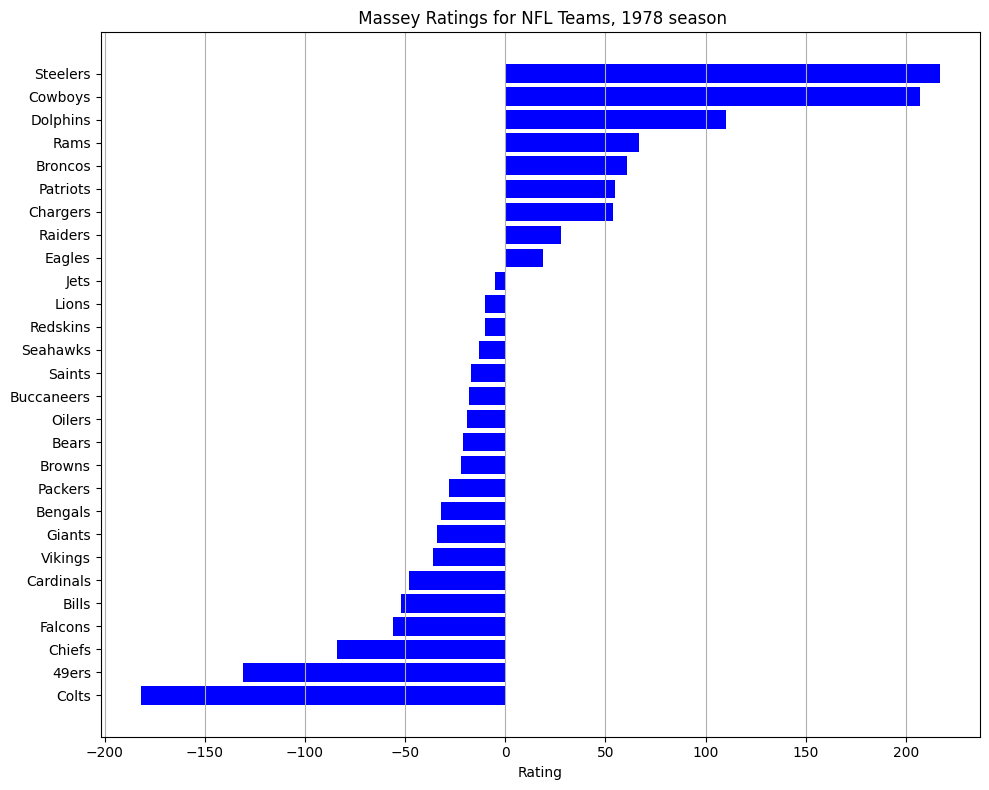

In [ ]:
import matplotlib.pyplot as plt

team_df_total = team_df_total.sort_values("Total Point Differential", ascending = True) # Organizing into ascending order

plt.figure(figsize=(10, 8))
plt.barh(team_df_total.index, team_df_total['Total Point Differential'], color='blue')
plt.xlabel('Rating'); plt.title(' Massey Ratings for NFL Teams, 1978 season')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Reflection (Group)

The Massey Rating system has proven itself to be a complex way of analyzing team "rankings", as opposed to the traditional "1st place, 2nd place, etc..." In this particular analysis, we utilized team point differential to establish a ranking system. Team point differential is the difference between the number of points a team scores and the number of points is scored on that team (can also be looked at "points for" minus "points against"). First, we had to perform calculations across the entire dataframe to establish values for our "point differential" column, as well as structure it, reminiscing the teachings of linear algebra. Our familiarity with matrices facilitated the process. Afterwards, it was a matter of condensing all values into 1, and plot it. That is what the plot "Massey Ratings for NFL Teams, 1978 Season" illustrates. A ranking system like this one opens your eyes to the skill disparities that exist within teams. We're sure you'd be able to create a graph just like this in any other sport. What we noted as one of the most interesting parts of this analysis is the ability to mark a threshold on season dominance as well as playing a bad season. Unlike the traditional first place-second place ranking system, the Massey Rating system lets us see just how big the difference is for top teams and underperforming teams. 2nd place and 3rd place may seem close, but in our case, we can see that the point differential of the team in 2nd place (Cowboys) is nearly double that of the team in 3rd place (Dolphins). This provides much more insight than just "this team is underneath the other". It would be nice to see sports integrate a system where win-loss ratios can be supplemented.